In [3]:
import numpy as np
from Function import LossFunctionTask2, LossFunctionTask2_MaxDistance
from utils import generate_adj_matrix
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def plot_scenario(
    robots_pos: np.ndarray, private_targets: np.ndarray, old_robots_pos=None
):
    colors = [
        "tab:orange",
        "tab:purple",
        "tab:green",
        "tab:blue",
        "tab:cyan",
        "tab:red",
    ]
    barycenter = np.mean(robots_pos, axis=0)
    plt.plot(
        barycenter[0],
        barycenter[1],
        "s",
        color="tab:blue",
        label="Barycenter",
        markersize=20,
        alpha=0.75,
    )
    for i in range(len(robots_pos)):
        plt.plot(
            robots_pos[i][0],
            robots_pos[i][1],
            "o",
            color=colors[i % len(colors)],
            markersize=12,
        )

        # Draw small lines segment from robot to barycenter
        plt.plot(
            [robots_pos[i][0], barycenter[0]],
            [robots_pos[i][1], barycenter[1]],
            color=colors[i % len(colors)],
            linestyle="dashdot",
            alpha=0.2,
        )

    for i in range(len(private_targets)):
        plt.plot(
            private_targets[i][0],
            private_targets[i][1],
            "X",
            color=colors[i % len(colors)],
            label=f"Target {i}",
            markersize=8,
            alpha=0.75,
        )

    if old_robots_pos is not None:
        # Trace the path of the robots
        for i in range(len(robots_pos)):
            plt.plot(
                [old_robots_pos[j][i][0] for j in range(len(old_robots_pos))],
                [old_robots_pos[j][i][1] for j in range(len(old_robots_pos))],
                color=colors[i % len(colors)],
                linestyle="--",
                alpha=0.5,
            )


def phi(x):
    return x


def grad_phi(x):
    return np.ones(x.shape[0])


def gradient_tracking_algorithm(
    loss_functions: list[LossFunctionTask2],
    z0: np.ndarray,
    A: np.ndarray,
    alpha: callable,
    num_iters: int,
    num_agents: int,
    phi: callable = phi,
    grad_phi: callable = grad_phi,
):
    z = np.zeros((num_iters + 1, z0.shape[0], z0.shape[1]))
    s = np.zeros((num_iters + 1, z0.shape[0], z0.shape[1]))
    v = np.zeros((num_iters + 1, z0.shape[0], z0.shape[1]))

    z[0] = z0
    s[0] = phi(z0)
    for i in range(num_agents):
        v[0] = loss_functions[i].grad_sigma_z(z[0][i], s[0][i])

    for k in range(num_iters):
        for i in range(num_agents):
            neighbors = np.nonzero(A[i])[0]

            z[k + 1, i] = z[k, i] - alpha(k) * (
                loss_functions[i].grad_z(z[k, i], s[k, i]) + v[k, i] * grad_phi(z[k, i])
            )
            s[k + 1, i] = sum(A[i, j] * s[k, j] for j in neighbors) + (
                phi(z[k + 1, i]) - phi(z[k, i])
            )
            v[k + 1, i] = sum(A[i, j] * v[k, j] for j in neighbors) + (
                loss_functions[i].grad_sigma_z(z[k + 1, i], s[k + 1, i])
                - loss_functions[i].grad_sigma_z(z[k, i], s[k, i])
            )

    return z


#############################
# PARAMETERS
#############################

NUM_ROBOTS = 3
VAR_DIMS = 2
SEED = 42
NUM_ITERATIONS = 10000
ALPHA = lambda k: 3e-5
MAX_DISTANCES = [0, 0.5, 0.5] 

rng = np.random.default_rng(SEED)

#############################
# PROBLEM SETUP
#############################

private_targets = rng.random(size=(NUM_ROBOTS, VAR_DIMS))
loss_functions = [
    LossFunctionTask2_MaxDistance(private_targets[i], MAX_DISTANCES[i]) for i in range(NUM_ROBOTS)
]
robot_initial_positions = rng.random(size=(NUM_ROBOTS, VAR_DIMS))

G, A = generate_adj_matrix(
    NUM_ROBOTS,
    connected=True,
    seed=SEED,
    graph_algorithm="erdos_renyi",
    erdos_renyi_p=0.3,
)

z_history = gradient_tracking_algorithm(
    loss_functions=loss_functions,
    z0=robot_initial_positions.copy(),
    A=A,
    num_iters=NUM_ITERATIONS,
    alpha=ALPHA,
    num_agents=NUM_ROBOTS,
)

[-0.00112033  0.03034899]
[-0.0392295  -0.01326378]
[0. 0.]
[-0.00024486  0.00663303]
[-0.02445402 -0.00826808]
[0. 0.]
[-0.00016342  0.0044269 ]
[-0.09996831 -0.03380002]
[0. 0.]
[-0.0001224   0.00331504]
[0. 0.]
[0. 0.]
[-9.74992242e-05  2.63905367e-03]
[0. 0.]
[0. 0.]
[-8.07617508e-05  2.18400202e-03]
[0. 0.]
[0. 0.]
[-6.87607391e-05  1.85694757e-03]
[0. 0.]
[0. 0.]
[-5.97422632e-05  1.61082842e-03]
[0. 0.]
[0. 0.]
[-5.27234054e-05  1.41915426e-03]
[0. 0.]
[0. 0.]
[-4.71108406e-05  1.26584807e-03]
[0. 0.]
[0. 0.]
[-4.25248329e-05  1.14058152e-03]
[0. 0.]
[0. 0.]
[-3.87108633e-05  1.03641570e-03]
[0. 0.]
[0. 0.]
[-3.54918912e-05  9.48516853e-04]
[0. 0.]
[0. 0.]
[-3.27409561e-05  8.73415165e-04]
[0. 0.]
[0. 0.]
[-3.03646512e-05  8.08556200e-04]
[0. 0.]
[0. 0.]
[-2.82927400e-05  7.52018381e-04]
[0. 0.]
[0. 0.]
[-2.64714033e-05  7.02328954e-04]
[0. 0.]
[0. 0.]
[-2.48587171e-05  6.58340594e-04]
[0. 0.]
[0. 0.]
[-2.34215457e-05  6.19146537e-04]
[0. 0.]
[0. 0.]
[-2.21333600e-05  5.84020919

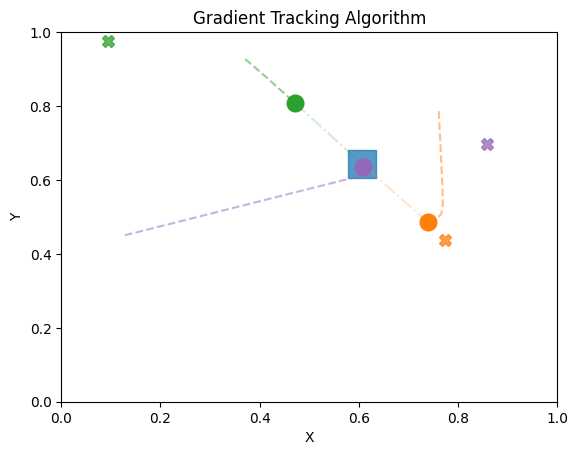

In [4]:
from IPython.display import HTML
# Create an animation, by showing the scenario at each iteration
def animate_scenario(z_history, private_targets, frames):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title("Gradient Tracking Algorithm")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    # frames = range(0, 200, skip)

    def update(frame_idx):
        ax.clear()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title("Gradient Tracking Algorithm")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        plot_scenario(z_history[frames[frame_idx]], private_targets, z_history[:frames[frame_idx] + 1])
        return (ax,)

    ani = FuncAnimation(fig, update, frames=len(frames), blit=False, interval=200)

    # Fix: Display the animation
    display(HTML(ani.to_jshtml()))

    # Save the animation as a video file
    ani.save("gradient_tracking_animation.mp4", fps=10, extra_args=["-vcodec", "libx264"])
    # plt.show()

animate_scenario(z_history, private_targets, frames=range(0, 10000, 100))

# Idea
Maybe, regardless of the value of gamma, tge barycenter of the group always converges to the barycenter of the targets.